# Baseline MNIST

In [1]:
import tensorflow as tf
import numpy as np
import os
from scipy.special import softmax
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
import vbranch as vb

In [3]:
save = False
model_id = 1
architecture = 'fcn'

## Load Data

In [4]:
num_classes = 10
(X_train, y_train_one_hot), (X_test, y_test_one_hot) = vb.datasets.mnist.load_data(format=architecture)

In [5]:
input_shape = X_train.shape[1:]
print(input_shape)

(784,)


## Build Model

In [6]:
BATCH_SIZE = 32
EPOCHS = 100
STEPS_PER_EPOCH = 100
model_path = './models/mnist-{}_{}'.format(architecture, model_id)

In [7]:
tf.reset_default_graph()

x = tf.placeholder('float32', (None,) + input_shape, name='x')
y = tf.placeholder('float32', [None, num_classes], name='y')

batch_size = tf.placeholder('int64', name='batch_size')

dataset = tf.data.Dataset.from_tensor_slices((x,y)).\
    batch(batch_size).repeat().\
    shuffle(buffer_size=4*BATCH_SIZE)

iter_ = dataset.make_initializable_iterator()
inputs, labels_one_hot = iter_.get_next('input')

In [8]:
def build_model(architecture, inputs, labels, num_classes,model_id,test=False):
    if architecture == 'fcn':
        model = vb.simple_fcn(inputs,128,num_classes,
            name='model_'+str(model_id))
    elif architecture == 'cnn':
        model = vb.simple_cnn(inputs,num_classes,16,32,
            name='model_'+str(model_id))
    else:
        raise ValueError('Invalid architecture')

    optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
    model.compile(optimizer, 'softmax_cross_entropy_with_logits',
                    labels_one_hot=labels, test=test)
    model.summary()
    return model

In [9]:
model = build_model(architecture, inputs, labels_one_hot, num_classes, model_id)

i  Layer name  Output shape  Parameters        Num param  Inbound  
-------------------------------------------------------------------
   Input       [None,784]                                          
-------------------------------------------------------------------
0  fc1         [None,128]    [784,128] [128]   100480     input:0  
-------------------------------------------------------------------
1  bn1         [None,128]    [128] [128]       256        fc1      
-------------------------------------------------------------------
2  relu1       [None,128]                      0          bn1      
-------------------------------------------------------------------
3  fc2         [None,10]     [128,10] [10]     1290       relu1    
-------------------------------------------------------------------
4  bn2         [None,10]     [10] [10]         20         fc2      
-------------------------------------------------------------------
5  output      [None,10]                       0

In [10]:
# Build copy of model for testing
x_test = tf.placeholder('float32', (None,) + input_shape, name='x_test')
y_test = tf.placeholder('float32', [None, num_classes], name='y_test')
test_model = build_model(architecture, x_test, y_test,num_classes,model_id, test=True)

i  Layer name  Output shape  Parameters        Num param  Inbound   
--------------------------------------------------------------------
   Input       [None,784]                                           
--------------------------------------------------------------------
0  fc1         [None,128]    [784,128] [128]   100480     x_test:0  
--------------------------------------------------------------------
1  bn1         [None,128]    [128] [128]       256        fc1       
--------------------------------------------------------------------
2  relu1       [None,128]                      0          bn1       
--------------------------------------------------------------------
3  fc2         [None,10]     [128,10] [10]     1290       relu1     
--------------------------------------------------------------------
4  bn2         [None,10]     [10] [10]         20         fc2       
--------------------------------------------------------------------
5  output      [None,10]          

In [11]:
history = model.fit(iter_, X_train, y_train_one_hot, EPOCHS, STEPS_PER_EPOCH, BATCH_SIZE, 
                    validation=(X_test, y_test_one_hot), test_model=test_model)

Epoch 1/100
 - 1s - train_acc: 0.7538 - train_loss: 1.1231 - val_acc: 0.8939 - val_loss: 0.7635
Epoch 2/100
 - 0s - train_acc: 0.8981 - train_loss: 0.7317 - val_acc: 0.9128 - val_loss: 0.6258
Epoch 3/100
 - 0s - train_acc: 0.9222 - train_loss: 0.6056 - val_acc: 0.9179 - val_loss: 0.5452
Epoch 4/100
 - 0s - train_acc: 0.9347 - train_loss: 0.5307 - val_acc: 0.9292 - val_loss: 0.4831
Epoch 5/100
 - 0s - train_acc: 0.9459 - train_loss: 0.4682 - val_acc: 0.9341 - val_loss: 0.4400
Epoch 6/100
 - 0s - train_acc: 0.9569 - train_loss: 0.4091 - val_acc: 0.9362 - val_loss: 0.4012
Epoch 7/100
 - 0s - train_acc: 0.9659 - train_loss: 0.3530 - val_acc: 0.9385 - val_loss: 0.3651
Epoch 8/100
 - 0s - train_acc: 0.9678 - train_loss: 0.3259 - val_acc: 0.9401 - val_loss: 0.3448
Epoch 9/100
 - 0s - train_acc: 0.9762 - train_loss: 0.2905 - val_acc: 0.9419 - val_loss: 0.3233
Epoch 10/100
 - 0s - train_acc: 0.9759 - train_loss: 0.2620 - val_acc: 0.9433 - val_loss: 0.3089
Epoch 11/100
 - 0s - train_acc: 0.9828 

Epoch 86/100
 - 0s - train_acc: 0.9997 - train_loss: 0.0034 - val_acc: 0.9501 - val_loss: 0.1699
Epoch 87/100
 - 0s - train_acc: 1.0000 - train_loss: 0.0026 - val_acc: 0.9493 - val_loss: 0.1701
Epoch 88/100
 - 0s - train_acc: 0.9981 - train_loss: 0.0071 - val_acc: 0.9423 - val_loss: 0.2039
Epoch 89/100
 - 0s - train_acc: 0.9741 - train_loss: 0.0801 - val_acc: 0.9311 - val_loss: 0.2347
Epoch 90/100
 - 0s - train_acc: 0.9856 - train_loss: 0.0594 - val_acc: 0.9412 - val_loss: 0.1933
Epoch 91/100
 - 0s - train_acc: 0.9966 - train_loss: 0.0233 - val_acc: 0.9451 - val_loss: 0.1826
Epoch 92/100
 - 0s - train_acc: 0.9978 - train_loss: 0.0156 - val_acc: 0.9488 - val_loss: 0.1739
Epoch 93/100
 - 0s - train_acc: 0.9966 - train_loss: 0.0188 - val_acc: 0.9463 - val_loss: 0.1740
Epoch 94/100
 - 0s - train_acc: 0.9994 - train_loss: 0.0102 - val_acc: 0.9487 - val_loss: 0.1671
Epoch 95/100
 - 0s - train_acc: 0.9994 - train_loss: 0.0075 - val_acc: 0.9490 - val_loss: 0.1732
Epoch 96/100
 - 0s - train_acc

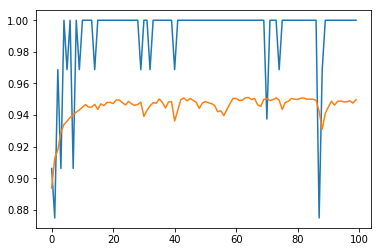

In [12]:
plt.plot(history['train_acc'])
plt.plot(history['val_acc'])
plt.show()

In [13]:
import pickle

with open("baseline-history-3.pkl","wb") as f:
    pickle.dump(history, f)

In [22]:
with open('baseline-history.pkl', 'rb') as f:
    data = pickle.load(f)

In [23]:
data

{'train_acc': [0.84375,
  0.9375,
  0.875,
  0.9375,
  0.90625,
  0.96875,
  1.0,
  0.96875,
  0.96875,
  0.96875,
  0.96875,
  1.0,
  1.0,
  1.0,
  0.96875,
  1.0,
  1.0,
  0.96875,
  1.0,
  0.90625,
  0.96875,
  0.9375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.90625,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9375,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9375,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'train_loss': [0.8986679,
  0.6232755,
  0.73987865,
  0.383486,
  0.47834414,
  0.37789997,
  0.2119155,
  0.3483417,
  0.24298589,
  0.240397,
  0.20440511,
  0.18943535,
  0.16565984,
  0.15889521,
  0.2774533

## Model Ensemble

In [66]:
test_outputs = []
test_losses = []
test_accs = []

num_models = 4
graphs = [tf.Graph() for _ in range(5)]
sessions = [tf.Session(graph=g) for g in graphs]

for i in np.random.choice(5, num_models, replace=False): # range(len(graphs)):
    with graphs[i].as_default():
        model_path = './models/mnist-{}_{}'.format(architecture, i + 1)
        meta_path = os.path.join(model_path, 'ckpt.meta')
        ckpt = tf.train.get_checkpoint_state(model_path)
        
        imported_graph = tf.train.import_meta_graph(meta_path)
        imported_graph.restore(sessions[i], ckpt.model_checkpoint_path)
                
        sessions[i].run('test_init_op', feed_dict={'batch_size:0': len(X_test)})
        
        output, loss, acc = sessions[i].run(['model_%d'%(i+1)+'/'+'output:0', 
                                             'loss:0', 'acc:0'])
        test_outputs.append(output)
        test_losses.append(loss)
        test_accs.append(acc)

INFO:tensorflow:Restoring parameters from ./models/mnist_5/ckpt
INFO:tensorflow:Restoring parameters from ./models/mnist_2/ckpt
INFO:tensorflow:Restoring parameters from ./models/mnist_1/ckpt
INFO:tensorflow:Restoring parameters from ./models/mnist_4/ckpt


In [67]:
test_accs

[0.944, 0.9465, 0.9472, 0.9471]

In [68]:
def compute_acc(pred, labels_one_hot):
    pred_max = tf.keras.utils.to_categorical(np.argmax(pred, axis=-1), num_classes)
    return np.mean(np.sum(labels_one_hot*pred_max, axis=1))

In [69]:
for i in range(num_models):
    assert compute_acc(test_outputs[i], y_test_one_hot) == test_accs[i]

### Average Predictions Before Softmax

In [70]:
before_mean_output = np.array(test_outputs).mean(axis=0)
before_mean_acc = compute_acc(softmax(before_mean_output, axis=-1), y_test_one_hot)

In [71]:
print(before_mean_acc)

0.9536


### Average Predictions After Softmax

In [72]:
after_mean_output = softmax(np.array(test_outputs), axis=-1).mean(axis=0)
after_mean_acc = compute_acc(softmax(after_mean_output, axis=-1), y_test_one_hot)

In [73]:
print(after_mean_acc)

0.9539


## Feature Visualization

In [18]:
with tf.Session() as sess:
    model_path = os.path.join('models', 'mnist-{}_{}'.format(architecture,model_id))
    meta_path = os.path.join(model_path, 'ckpt.meta')
    ckpt = tf.train.get_checkpoint_state(model_path)

    imported_graph = tf.train.import_meta_graph(meta_path)
    imported_graph.restore(sess, ckpt.model_checkpoint_path)

    sample_size = 250
    sess.run('test_init_op', feed_dict={'batch_size:0':sample_size})
    X_test_samples, y_test_samples, features = sess.run(['input:0', 'input:1', 
                                                         'model_'+str(model_id)+'/output:0'])

INFO:tensorflow:Restoring parameters from models/mnist-cnn_1/ckpt


In [23]:
start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.001s...
[t-SNE] Computed neighbors for 250 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 5.143837
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.256058
[t-SNE] KL divergence after 300 iterations: 0.292163
t-SNE done! Time elapsed: 0.5325720310211182 seconds


In [28]:
labels = np.argmax(y_test_samples, axis=-1)

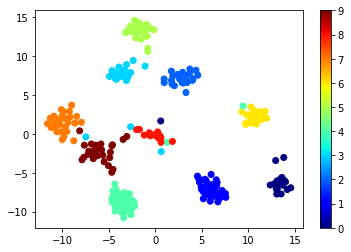

In [29]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.jet)
plt.colorbar()
plt.show()